# PREDICTION DES RETARDS DE VOL

---

## 1. IMPORT DES LIBRAIRIES

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim

---

## 2. CHARGEMENT DES DONNÉES

Nos données sont réparties dans plusieurs fichiers. Nous allons donc, dans un premier temps, travailler avec le premier fichier "2016_01.csv" afin de mieux comprendre et analyser nos données.

Dans un second temps, nous déterminerons s’il est nécessaire ou pertinent de travailler avec les autres fichiers.

**Chargement du dataset "2016_01.csv"**

In [45]:
data = pd.read_csv("data/2016_01.csv")
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 445827 │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 65     │ │ int64       │ 20    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 15    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                    All null                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                             ┃ NA                            ┃ NA %                  ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Unnamed: 64                                        │                        445827 │                   100 │  │
│ └────────────────────────────────────────────────────┴───────────────────────────────┴───────────────────────┘  │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA     ┃ NA %     ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ YEAR    │      0 │        0 │    2016 │       0 │    2016 │    2016 │    2016 │    2016 │    2016 │     █  │  │
│ │ QUARTER │      0 │        0 │       1 │       0 │       1 │       1 │       1 │       1 │       1 │     █  │  │
│ │ MONTH   │      0 │        0 │       1 │       0 │       1 │       1 │       1 │       1 │       1 │     █  │  │
│ │ DAY_OF_ │      0 │        0 │   15.89 │   8.937 │       1 │       8 │      16 │      24 │      31 │ ▇▇▇▆▇█ │  │
│ │ MONTH   │        │          │         │         │         │         │         │         │         │        │  │
│ │ DAY_OF_ │      0 │        0 │   4.114 │   2.005 │       1 │       2 │       4 │       6 │       7 │ ▄▄▄▄▄█ │  │
│ │ WEEK    │        │          │         │         │         │         │         │         │         │        │  │
│ │ AIRLINE │      0 │        0 │   19900 │   382.9 │   19390 │   19790 │   19800 │   20300 │   21170 │  ▄█ ▅  │  │
│ │ _ID     │        │          │         │         │         │         │         │         │         │        │  │
│ │ FL_NUM  │      0 │        0 │    2079 │    1757 │       1 │     702 │    1594 │    2763 │    7438 │ █▆▂▂▂▁ │  │
│ │ ORIGIN_ │      0 │        0 │   12680 │    1529 │   10140 │   11290 │   12890 │   14030 │   16220 │ ▇▆▆█▆▁ │  │
│ │ AIRPORT │        │          │         │         │         │         │         │         │         │        │  │
│ │ _ID     │        │          │         │         │         │         │         │         │         │        │  │
│ │ ORIGIN_ │      0 │        0 │ 1268000 │  152900 │ 1014000 │ 1129000 │ 1289000 │ 1403000 │ 1622000 │ ▇▆▆█▆▁ │  │
│ │ AIRPORT │        │          │         │         │         │         │         │         │         │        │  │
│ │ _SEQ_ID │        │          │         │         │   

---

## 3. EXPLORATION DES DONNÉES

### Objectif :
- Comprendre du mieux possible nos données
- Développer une premiere stratégie de modélisation 

### Checklist de base
#### Analyse de Forme :
- **variable target** : 
- **lignes et colonnes** : 445827, 65
- **types de variables** : 
- **Analyse des valeurs manquantes** :

#### Analyse de Fond :
- **Visualisation de la target** :
- **Signification des variables** :
- **Relation Variables / Target** :
    
    
    
#### Analyse plus détaillée

- **Relation Variables / Variables** :
- **NaN analyse** : 

#### hypotheses nulle (H0): 


---

### Analyse de la forme des données

In [43]:
df = data.copy()

In [44]:
df.shape

(445827, 65)

<Axes: ylabel='count'>

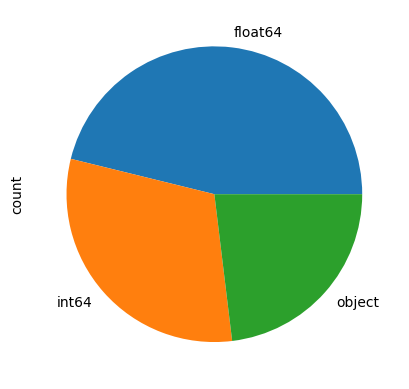

In [46]:
df.dtypes.value_counts().plot.pie()

<Axes: >

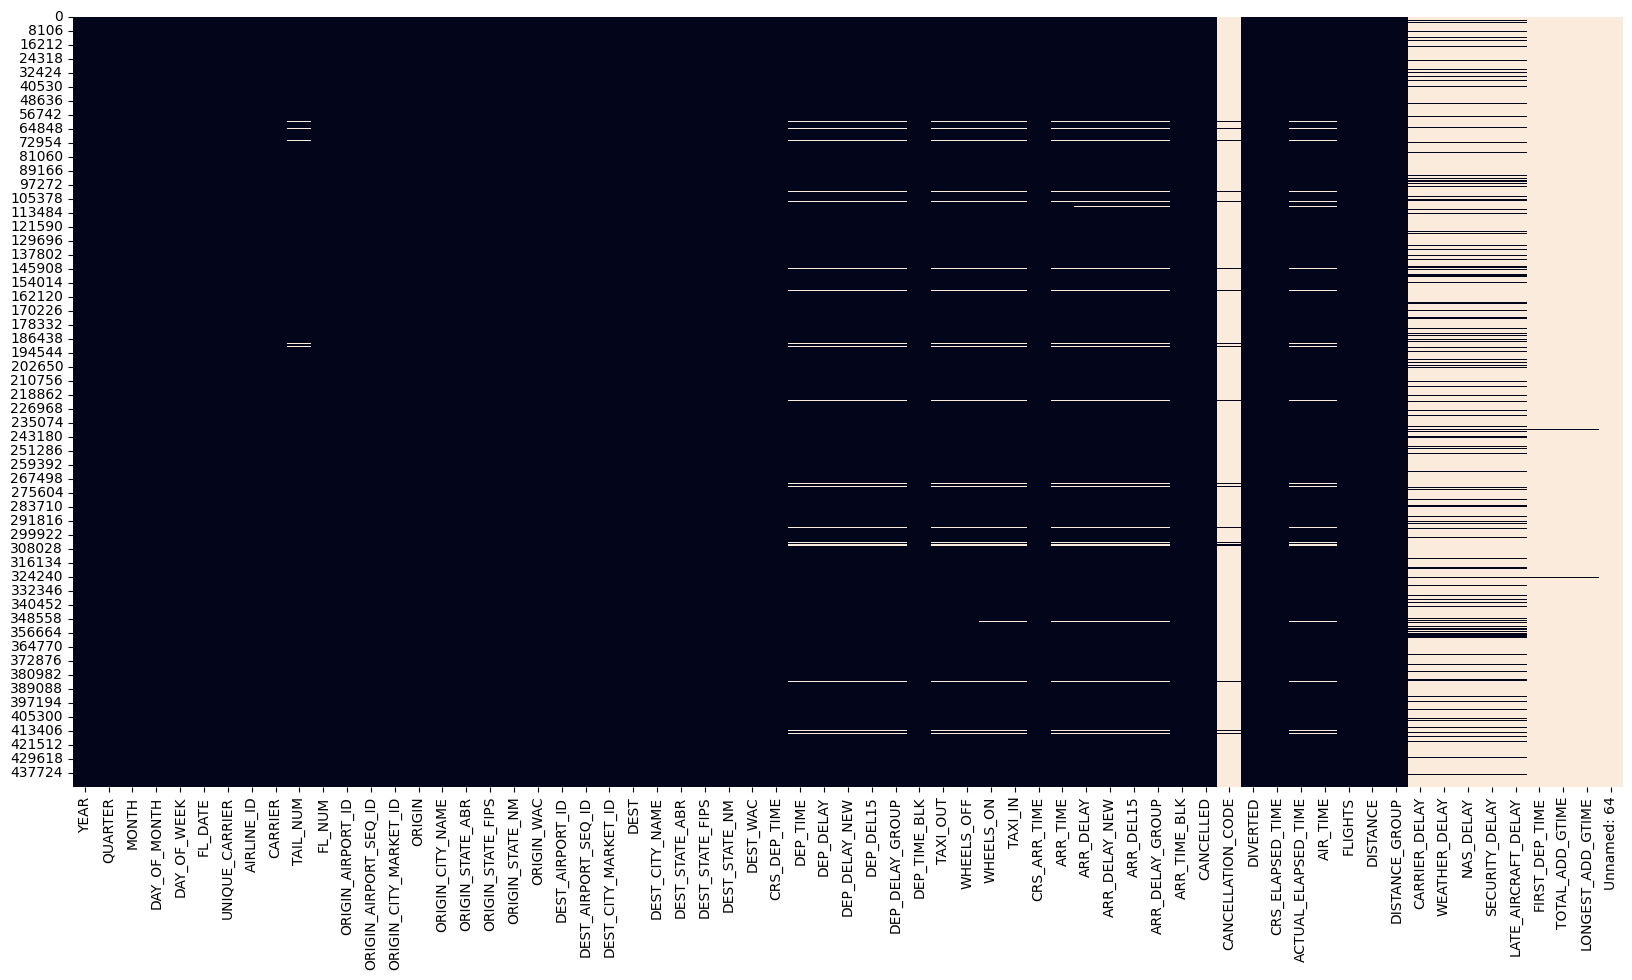

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## 4. VISUALISATIONS

## 5.MODÉLISATION